In [12]:
import networkx as nx
import matplotlib.pyplot as plt
import warnings
import pandas as pd 
warnings.filterwarnings('ignore')

In [13]:
D=nx.read_edgelist("annon_net.csv",delimiter=',',create_using=nx.DiGraph())

In [14]:
R = D.to_undirected(reciprocal=True)
R= max(nx.connected_component_subgraphs(R), key=len)

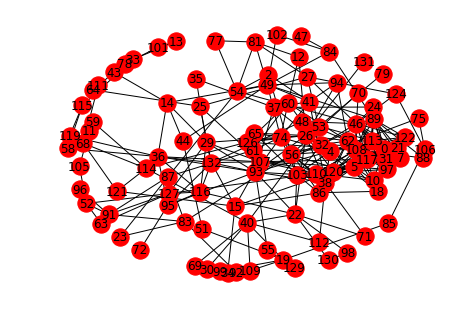

106


In [15]:
for node in R.nodes():
    if R.degree(node)==0:
        R.remove_node(node)
nx.draw(R,with_labels=True)
plt.show()
print(len(R.nodes()))

In [10]:
degree_dic={}
for node in R.nodes():
    degree_dic[node]=R.degree(node)
print(sorted(degree_dic.items(),key=lambda x:x[1],reverse=True))

[('5', 19), ('108', 18), ('46', 18), ('93', 16), ('113', 15), ('0', 15), ('89', 14), ('31', 14), ('117', 14), ('26', 13), ('120', 12), ('62', 12), ('97', 12), ('107', 12), ('110', 11), ('103', 11), ('21', 10), ('49', 10), ('7', 10), ('74', 10), ('56', 9), ('122', 9), ('132', 9), ('32', 9), ('38', 9), ('22', 8), ('29', 8), ('36', 8), ('10', 8), ('40', 8), ('127', 7), ('86', 7), ('126', 7), ('54', 6), ('60', 6), ('15', 6), ('19', 6), ('4', 6), ('41', 6), ('87', 6), ('116', 6), ('24', 6), ('95', 5), ('81', 5), ('14', 5), ('114', 5), ('109', 5), ('48', 5), ('27', 5), ('61', 5), ('83', 5), ('37', 5), ('91', 5), ('25', 4), ('68', 4), ('18', 4), ('65', 4), ('53', 4), ('52', 4), ('84', 4), ('94', 4), ('69', 3), ('2', 3), ('33', 3), ('121', 3), ('58', 3), ('119', 3), ('44', 3), ('12', 3), ('106', 3), ('99', 3), ('115', 3), ('124', 3), ('55', 2), ('13', 2), ('63', 2), ('71', 2), ('59', 2), ('30', 2), ('105', 2), ('111', 2), ('51', 2), ('43', 2), ('77', 2), ('70', 2), ('130', 2), ('78', 2), ('112

In [11]:
threshold=4/10
affect_result={}
for node in R.nodes():
    num_of_affected_no_chg=False
    not_affected=R.nodes()
    affected=[]
    total=R.nodes()
    affected.append(node)
    NNN=0#TO MAKE THE PROGRAM DOUBLE CHECK
    while num_of_affected_no_chg == False:
        num_of_affected_before=len(affected)
        for i in not_affected:
            num_of_all_neighbors=0
            num_of_affected_neighbors=0
            num_of_all_neighbors=len(R.neighbors(i))
            for j in R.neighbors(i):
                if j in affected:num_of_affected_neighbors+=1
            if num_of_affected_neighbors/num_of_all_neighbors>=threshold:
                if i in affected:pass
                else:affected.append(i)
                not_affected.remove(i)
        num_of_affected_after=len(affected)
        if num_of_affected_before==num_of_affected_after:NNN+=1
        if NNN>3:num_of_affected_no_chg=True
    affect_result[node]=len(affected)
print(sorted(affect_result.items(),key=lambda x:x[1],reverse=True))
print("total num of nodes {}".format(len(R.nodes())))

[('40', 11), ('68', 8), ('114', 8), ('127', 7), ('33', 6), ('87', 6), ('19', 5), ('13', 4), ('22', 4), ('49', 4), ('111', 4), ('78', 4), ('52', 4), ('101', 4), ('54', 3), ('93', 3), ('106', 3), ('84', 3), ('38', 3), ('83', 3), ('95', 2), ('56', 2), ('55', 2), ('89', 2), ('25', 2), ('81', 2), ('15', 2), ('11', 2), ('14', 2), ('26', 2), ('105', 2), ('4', 2), ('29', 2), ('44', 2), ('109', 2), ('130', 2), ('53', 2), ('98', 2), ('129', 2), ('108', 2), ('46', 2), ('37', 2), ('91', 2), ('69', 1), ('2', 1), ('96', 1), ('60', 1), ('21', 1), ('63', 1), ('79', 1), ('31', 1), ('71', 1), ('120', 1), ('59', 1), ('30', 1), ('18', 1), ('121', 1), ('47', 1), ('58', 1), ('119', 1), ('51', 1), ('122', 1), ('117', 1), ('41', 1), ('62', 1), ('72', 1), ('132', 1), ('97', 1), ('110', 1), ('43', 1), ('107', 1), ('12', 1), ('77', 1), ('103', 1), ('7', 1), ('32', 1), ('70', 1), ('113', 1), ('116', 1), ('0', 1), ('74', 1), ('36', 1), ('86', 1), ('65', 1), ('99', 1), ('112', 1), ('35', 1), ('10', 1), ('23', 1), (